# Sheet 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 2 Similarity Measures on Jet Data Clusterings

(a)

load the ground truth labels and k-means partitions

In [2]:
# the dijet labels, corresponding to bottom, charm, light quarks
labels = np.load('data/dijet_labels.npy')

# 5 rows, each corresponding to a k-means clustering with [2, 3, 5, 10, 20] clusters respectively
partitions = np.load('data/dijet_clusters.npy') 
ks = [2, 3, 5, 10, 20]

print(labels.shape, partitions.shape)

(2233,) (5, 2233)


define function to create a hinton plot from a contingency matrix

In [3]:
from matplotlib import pyplot as plt


def hinton_plot(matrix, max_weight=None, ax=None):
    """
    Draw Hinton diagram for visualizing a weight matrix. 
    From https://matplotlib.org/3.1.1/gallery/specialty_plots/hinton_demo.html
    """
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

In [ ]:
# TODO: compute the contingency matrices between labels and k-means partitions
#       (either implement your own or find the function in sklearn.metrics.cluster)

# TODO: visualize the contingency matrices via hinton plots and 
#       label the plots by the number of clusters used in k-means


(b)

In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, v_measure_score

for k, partition in zip(ks, partitions):
    # TODO: compute and print the different scores as requested in the excercise

## 3 Mutual Information for Image Matching
(a)

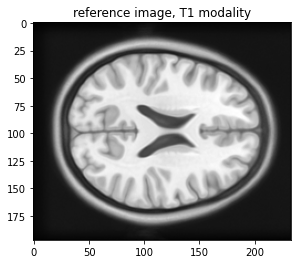

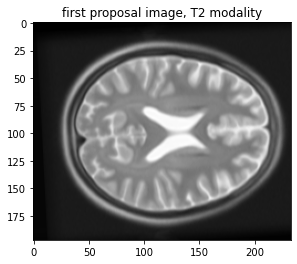

In [4]:
# load the reference image and the proposals
reference = np.load('data/t1_reference.npy')
proposals = np.load('data/t2_registration_proposals.npy')

plt.imshow(reference, cmap='gray')
plt.title('reference image, T1 modality')
plt.show();

plt.imshow(proposals[0], cmap='gray')
plt.title('first proposal image, T2 modality')
plt.show();

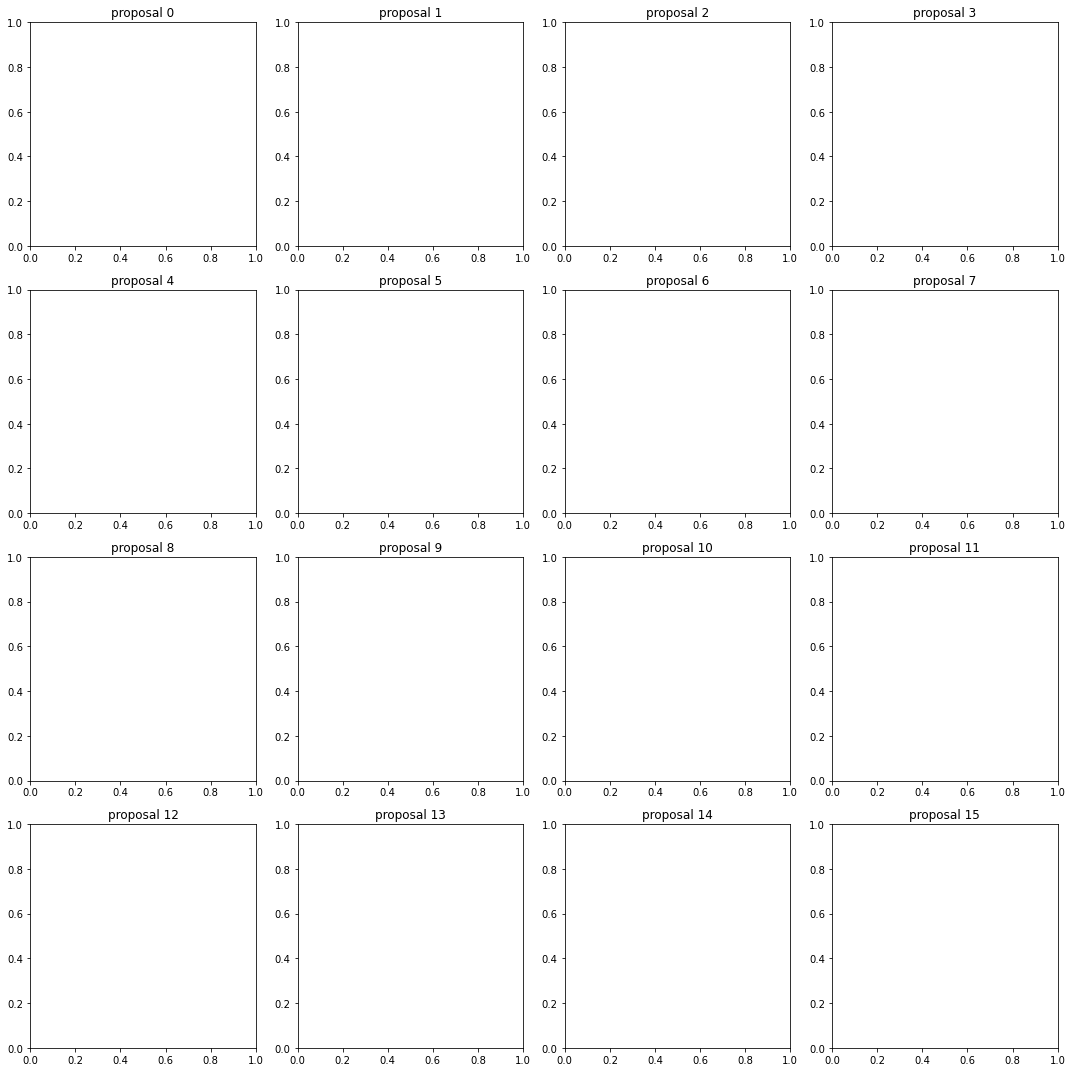

In [5]:
# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, proposal) in enumerate(zip(axs.flatten(), proposals)):
    # TODO: make a scatterplot of the reference pixel intensities vs the pixel intensities in the i-th proposal
    #       do not forget to label the axes
    
    ax.set_title(f'proposal {i}')
plt.tight_layout()
plt.show();

(b)

In [ ]:
# TODO: For each proposal, create a 2D histograms of pixel intensities of it and the reference 
#       (Choose a sensible range and bins for the histogram)
# Hint: np.histogram2d, flatten the arrays as pixel positions don't matter

histograms = 

# TODO: plot the histograms

# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, hist) in enumerate(zip(axs.flatten(), histograms)):
    # TODO: plot the histogram for the i'th proposal. 
    
    ax.set_title(f'proposal {i}')
    
plt.tight_layout()
plt.show();

In [ ]:
from sklearn.metrics import mutual_info_score

# TODO: for each histogram, compute the mutual information score

# TODO: order the proposal by MI, plot them in this order and include the scores in the titles of the plots